# Wine Recommendation System

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas_datareader.data as web
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
#wine130k = pd.read_csv("winemag130k.csv",index_col=0)
wine130k = pd.read_csv(r"C:\Users\Пользователь\Desktop\archive (4)\winemag-data-130k-v2.csv",index_col=0)

In [6]:
wine130k.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
wine130k.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971.0,NaN,NaN,NaN,88.447138,3.03973,80.0,86.0,88.0,91.0,100.0
price,120975.0,NaN,NaN,NaN,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wine130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


Поскольку мы видим, что большинство столбцов имеют объектный тип данных, мы попытались использовать столбцы данных с плавающей запятой и целые для исследовательского анализа данных.

## Исследовательский анализ данных

### Выяснение связи между ценой и баллами


In [9]:
Price=wine130k['price']

In [10]:
Points=wine130k['points']

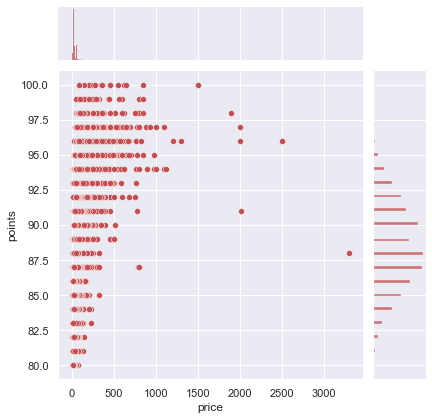

In [11]:
import warnings
warnings.simplefilter("ignore") #предупреждение
sns.jointplot( x = wine130k['price'],y = wine130k['points'],color='r');

Мы видим, что минимальное количество баллов, которое дает пользователь, составляет 80, а цена максимальных вин ниже 500.

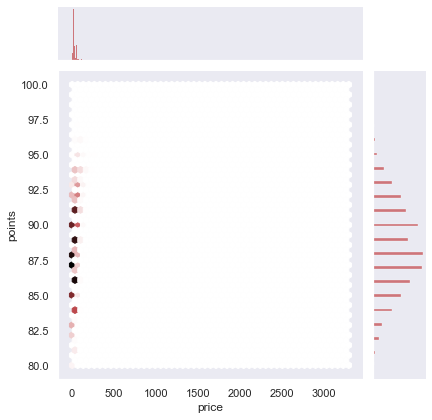

In [12]:
import warnings
warnings.filterwarnings('ignore')  #расширенная запись в список спецификаций фильтра предупреждений
with sns.axes_style("dark"):
    sns.jointplot(x=Price, y=Points, data=wine130k, kind="hex", color="r")

In [13]:
corelation=wine130k.corr()
corelation

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


### Подсчет винных обзоров разных стран

In [14]:
count = wine130k['country'].value_counts().to_frame()[0:16]
dfgr8tr = (count['country'] >146)
print(dfgr8tr)

US               True
France           True
Italy            True
Spain            True
Portugal         True
Chile            True
Argentina        True
Austria          True
Australia        True
Germany          True
New Zealand      True
South Africa     True
Israel           True
Greece           True
Canada           True
Hungary         False
Name: country, dtype: bool


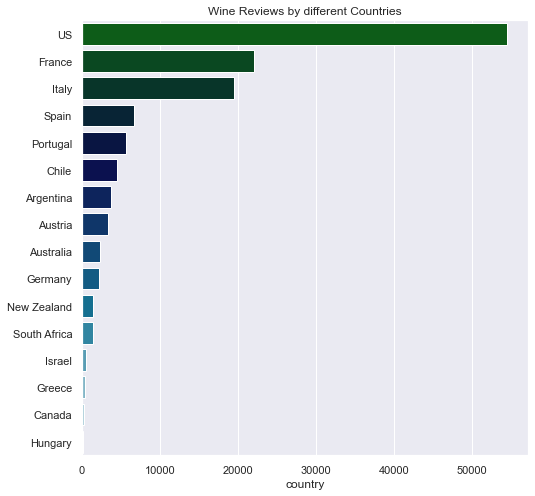

In [15]:
plt.figure(figsize=(8, 8))
sns.barplot(x= count['country'], y =count.index, data=count, palette='ocean',orient='h')
plt.title('Wine Reviews by different Countries');


США дали максимальное количество отзывов, а Венгрия — наименьшее

###  Общее количество баллов, присвоенных разными пользователями

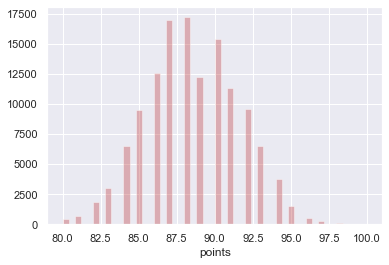

In [16]:
sns.distplot(wine130k['points'], color='r', kde=False);

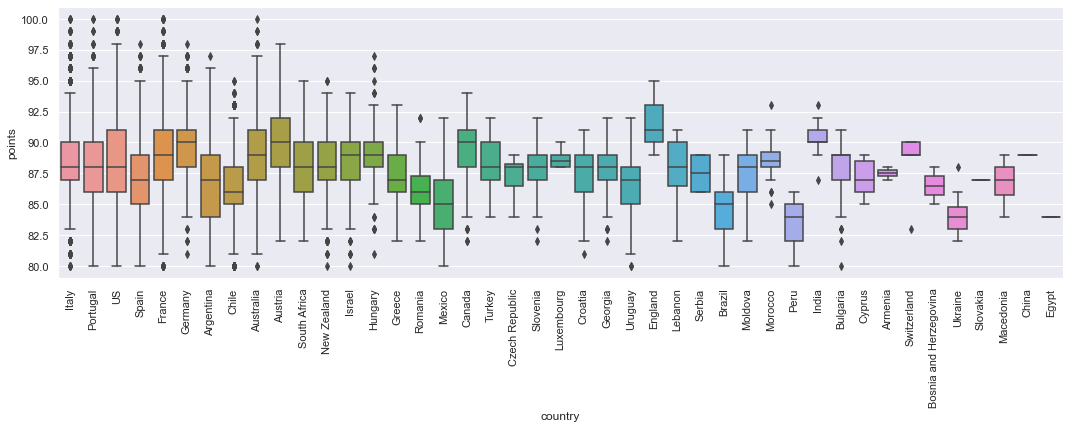

In [17]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=wine130k['country'], y=wine130k['points'], data=wine130k);
plt.xticks(rotation=90);


* Большинство рейтингов находятся между 87,5 и 90,0.
* Англия возглавила таблицу стран с самым высоким средним рейтингом вин.
* Видно, что все сорта имеют минимум 80 баллов.

### Связь между ценой и разнообразием

Text(0.5, 1.0, 'varieties with most expensive wine')

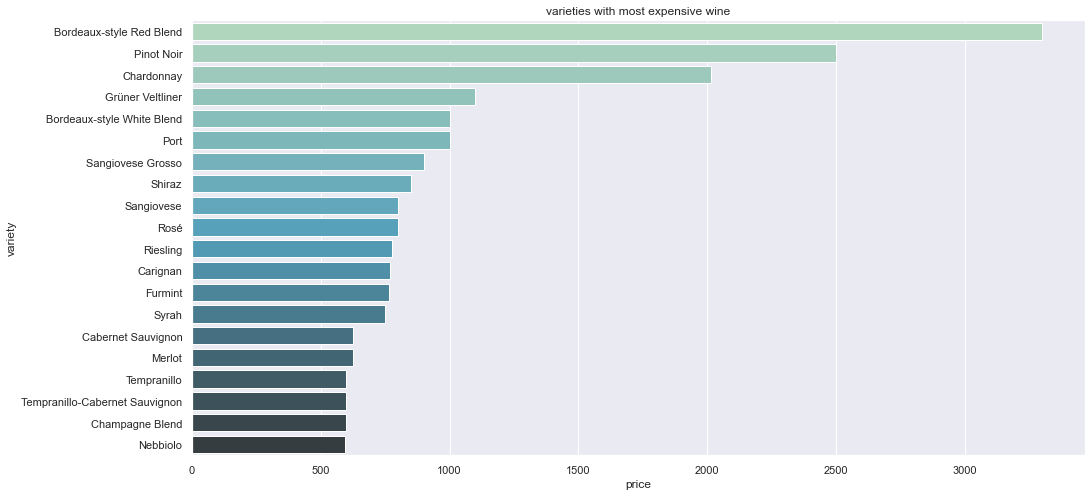

In [18]:
fig = plt.subplots(figsize=(16,8))
count = wine130k.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = count['price'], y = count.index, palette= 'GnBu_d')
plt.title("varieties with most expensive wine")



*Красная смесь бордоского типа – самая дорогая.

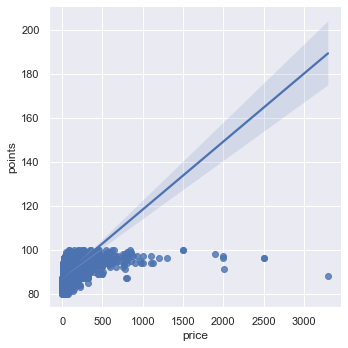

In [19]:
sns.lmplot(x="price", y="points", data=wine130k)

* Видно, что цены на большинство вин находятся в диапазоне от 0 до 1000.
* Вино с самой высокой ценой — 3300.
*Минимальный рейтинговый балл, который присваивается вину, начинается от 80.

### Винодельня с ценой и баллами


Text(0.5, 1.0, 'The most expensive wine is prepared in')

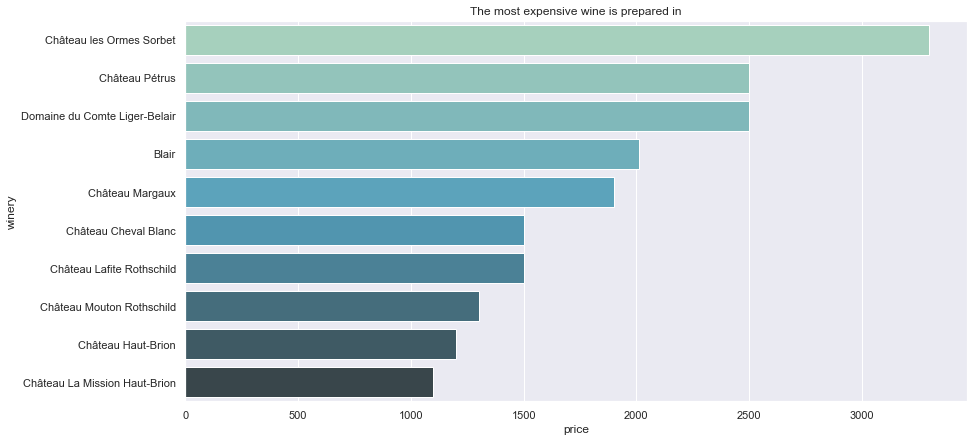

In [20]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The most expensive wine is prepared in')


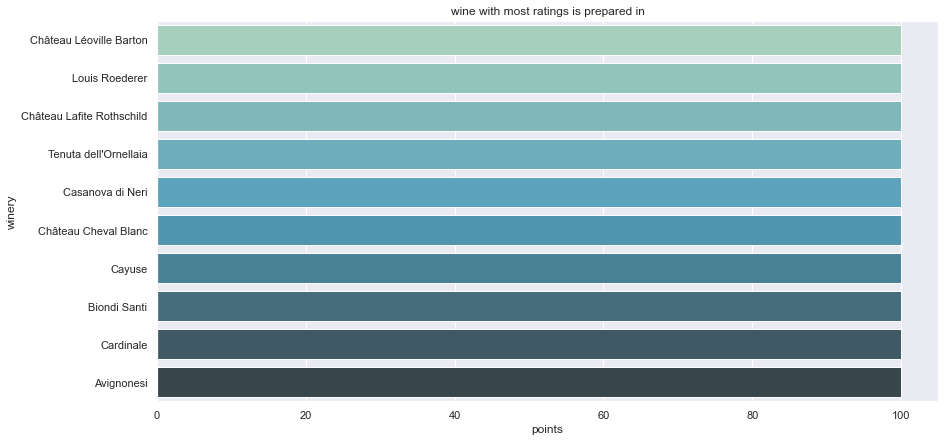

In [21]:
plt.subplots(figsize=(14,7))
cnt = wine130k.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:10]
sns.barplot(cnt['points'], y = cnt.index, palette = 'GnBu_d')
plt.title('wine with most ratings is prepared in');

### Провинция с ценой и баллами

Text(0.5, 1.0, 'The most expensive wine is prepared in the province')

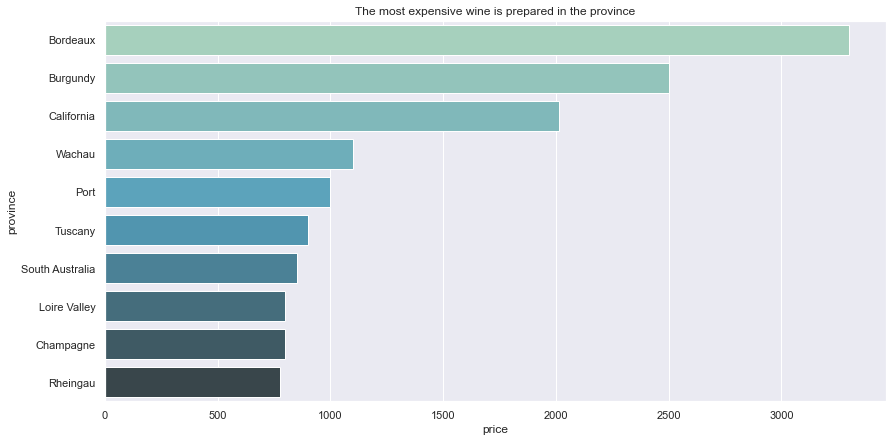

In [22]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['province'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The most expensive wine is prepared in the province')


Text(0.5, 1.0, 'The least price wine is prepared in the province')

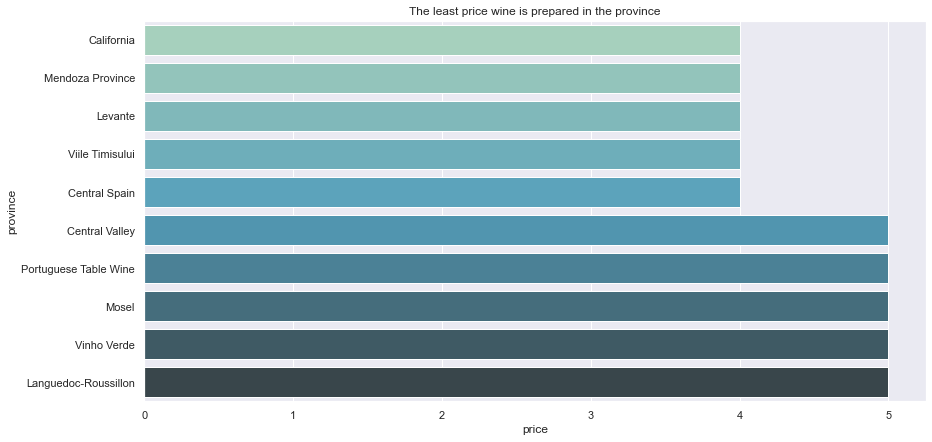

In [23]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['province'])['price'].min().to_frame().sort_values(by='price')[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The least price wine is prepared in the province')

In [24]:
count = wine130k.groupby(['province','variety','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
count.reset_index(inplace=True)
count.style.background_gradient(cmap='Blues')

,province,variety,points,count,min,max,mean
0,Bordeaux,Bordeaux-style Red Blend,100,4,150.000000,1500.000000,877.250000
1,South Australia,Shiraz,99,1,850.000000,850.000000,850.000000
2,Bordeaux,Bordeaux-style White Blend,100,1,848.000000,848.000000,848.000000
3,Champagne,Chardonnay,99,1,800.000000,800.000000,800.000000
4,Rheingau,Riesling,98,1,775.000000,775.000000,775.000000
5,Tokaji,Furmint,94,1,764.000000,764.000000,764.000000
6,Bordeaux,Bordeaux-style Red Blend,98,4,92.000000,1900.000000,683.000000
7,Port,Port,100,1,650.000000,650.000000,650.000000
8,Champagne,Chardonnay,100,1,617.000000,617.000000,617.000000
9,Northern Spain,Tempranillo-Cabernet Sauvignon,92,1,600.000000,600.000000,600.000000


In [25]:
count = wine130k.groupby(['taster_name','variety'])['points'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
count.reset_index(inplace=True)
count.style.background_gradient(cmap='Blues')

,taster_name,variety,count,min,max,mean
0,Joe Czerwinski,Cabernet-Shiraz,1,96,96,96.000000
1,Michael Schachner,Tinta del Pais,2,94,96,95.000000
2,Anne Krebiehl MW,Gelber Traminer,1,95,95,95.000000
3,Matt Kettmann,Monastrell,1,95,95,95.000000
4,Roger Voss,Terrantez,1,95,95,95.000000
5,Matt Kettmann,Grenache Blend,1,95,95,95.000000
6,Roger Voss,Bual,7,92,98,94.142857
7,Matt Kettmann,Syrah-Petit Verdot,1,94,94,94.000000
8,Joe Czerwinski,Muscadelle,6,89,99,94.000000
9,Matt Kettmann,Mourvèdre-Syrah,1,94,94,94.000000


## Modelling

###  Using KNN

In [26]:
wine130k = pd.read_csv(r"C:\Users\Пользователь\Desktop\archive (4)\winemag-data-130k-v2.csv",index_col=0)

In [27]:
winenew = wine130k.copy()

In [28]:
# мы прогнозируем вино на основе сорта провинции и баллов
col = ['province','variety','points']
rec_wine = winenew[col]

In [26]:
rec_wine

,province,variety,points
0,Sicily & Sardinia,White Blend,87
1,Douro,Portuguese Red,87
2,Oregon,Pinot Gris,87
3,Michigan,Riesling,87
4,Oregon,Pinot Noir,87
5,Northern Spain,Tempranillo-Merlot,87
6,Sicily & Sardinia,Frappato,87
7,Alsace,Gewürztraminer,87
8,Rheinhessen,Gewürztraminer,87
9,Alsace,Pinot Gris,87


In [29]:
rec_wine = rec_wine.dropna(axis=0, subset=['points'])
rec_wine = rec_wine.dropna(axis=0, subset=['variety'])
rec_wine = rec_wine.dropna(axis=0, subset=['province'])
rec_wine = rec_wine.drop_duplicates(['variety','province'])

In [30]:
#мы выбрали только вина с рейтингом выше 90

rec_wine = rec_wine[rec_wine['points'] >90]

In [29]:
rec_wine.head(10)

,province,variety,points
119,Alsace,Riesling,92
120,Piedmont,Nebbiolo,92
123,South Australia,Shiraz-Cabernet Sauvignon,92
125,Stellenbosch,Cabernet Sauvignon,91
127,Alsace,White Blend,91
128,Alsace,Pinot Blanc,91
129,Stellenbosch,Bordeaux-style Red Blend,91
131,Alsace,Alsace white blend,91
132,Simonsberg-Stellenbosch,Cabernet Sauvignon,91
136,Bordeaux,Bordeaux-style Red Blend,91


In [31]:
wine = rec_wine.pivot(index= 'variety',columns='province',values='points').fillna(0)

In [32]:
wine.head()

province,Aconcagua Valley,Aegean,Alentejano,Alentejo,Alsace,Andalucia,Ankara,Apalta,Atalanti Valley,Austria,...,Waipara,Walker Bay,Washington,Weinland Österreich,Weinviertel,Western Australia,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Sekt
variety,,,,,,,,,,,,,,,,,,,,,
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alfrocheiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alicante Bouschet,0.0,0.0,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aligoté,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alsace white blend,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
wine_matrix = csr_matrix(wine)

In [34]:
print(wine_matrix)

  (0, 24)	91.0
  (0, 65)	91.0
  (1, 141)	91.0
  (2, 2)	92.0
  (2, 3)	92.0
  (3, 24)	91.0
  (4, 4)	91.0
  (5, 110)	91.0
  (6, 120)	91.0
  (7, 2)	91.0
  (8, 115)	92.0
  (8, 128)	91.0
  (9, 8)	91.0
  (10, 21)	92.0
  (10, 27)	92.0
  (11, 96)	92.0
  (11, 154)	93.0
  (11, 168)	91.0
  (12, 10)	91.0
  (13, 134)	92.0
  (14, 54)	91.0
  (15, 13)	93.0
  (16, 11)	91.0
  (16, 13)	91.0
  (17, 24)	92.0
  :	:
  (220, 2)	91.0
  (220, 132)	91.0
  (220, 153)	92.0
  (221, 24)	91.0
  (222, 24)	92.0
  (222, 164)	94.0
  (223, 97)	91.0
  (224, 98)	92.0
  (225, 21)	93.0
  (225, 73)	92.0
  (225, 143)	91.0
  (225, 158)	93.0
  (225, 159)	92.0
  (226, 2)	91.0
  (226, 4)	91.0
  (226, 17)	92.0
  (226, 117)	92.0
  (226, 133)	91.0
  (226, 138)	93.0
  (226, 143)	92.0
  (226, 158)	92.0
  (227, 24)	92.0
  (228, 24)	94.0
  (229, 143)	91.0
  (230, 27)	92.0


In [35]:
sim=cosine_similarity(wine_matrix)

In [36]:
print('pairwise dense output:\n {}\n'.format(sim))

pairwise dense output:
 [[1.         0.         0.         ... 0.70710678 0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.70710678 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]



In [37]:
similarities_sparse = cosine_similarity(wine_matrix,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise sparse output:
   (0, 211)	0.5000000000000001
  (0, 63)	0.7071067811865476
  (0, 47)	0.7071067811865476
  (0, 228)	0.7071067811865476
  (0, 227)	0.7071067811865476
  (0, 222)	0.49459506412483273
  (0, 221)	0.7071067811865476
  (0, 193)	0.5054049273393109
  (0, 192)	0.7071067811865476
  (0, 186)	0.7071067811865476
  (0, 185)	0.7071067811865476
  (0, 183)	0.7071067811865476
  (0, 182)	0.3593332533430208
  (0, 181)	0.4111744969542023
  (0, 179)	0.408248290463863
  (0, 173)	0.22359623107002366
  (0, 166)	0.3992841386048528
  (0, 164)	0.7071067811865476
  (0, 155)	0.7071067811865476
  (0, 146)	0.220924551368731
  (0, 134)	0.3141444244616561
  (0, 131)	0.5000000000000001
  (0, 125)	0.7071067811865476
  (0, 121)	0.7071067811865476
  (0, 118)	0.7071067811865476
  :	:
  (228, 93)	0.498624522930577
  (228, 89)	1.0
  (228, 83)	0.49589255727356607
  (228, 80)	1.0
  (228, 78)	0.5773502691896257
  (228, 59)	1.0
  (228, 58)	1.0
  (228, 57)	0.7071067811865476
  (228, 53)	1.0
  (228, 50)	1.0
 

In [38]:
knn = NearestNeighbors(n_neighbors=6,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_matrix)

In [39]:
query_index = np.random.choice(wine.shape[0])
dist, ind= model_knn.kneighbors(wine.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(dist.flatten())):
    if  i == 0:
        print('Recommendations for {0}:\n'.format(wine.index[query_index]))
    else:
        print('{1} with a distance of: {2}'.format(i,wine.index[ind.flatten()[i]],dist.flatten()[i]))

Recommendations for Bual:

Tinta Negra Mole with a distance of: 0.0
Bual with a distance of: 0.0
Terrantez with a distance of: 0.0
Sercial with a distance of: 0.0
Roussanne with a distance of: 1.0


## Evaluation

In [40]:
error = []
for query_index in range(wine.shape[0]):
    dist, ind= model_knn.kneighbors(wine.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

    actual_rating = wine130k['points'][wine130k['variety'] == wine.index[query_index]].mean()
    predicted_rating = wine130k['points'][wine130k['variety'].isin(list(wine.index[ind.flatten()][1:]))].mean()
    error.append(actual_rating - predicted_rating)

In [41]:
error

[1.3653182555190568,
 -0.2456162324649256,
 1.8781145305804472,
 -2.000294985250733,
 1.7721362229102198,
 0.12201407117088081,
 0.04795321637426753,
 -1.0133707324718557,
 1.1187041412759697,
 2.294414735591218,
 0.8797653958944238,
 0.687217832957117,
 1.765337586390217,
 3.538293216630194,
 1.9571428571428555,
 1.3300078652150518,
 2.1940515052593383,
 2.56637168141593,
 4.418604651162795,
 1.7615517241379308,
 -2.1770450042456844,
 0.8532958744722805,
 -0.050309221040933494,
 1.0674603174603163,
 0.7269841269841208,
 5.31139646869984,
 -0.1812570145903436,
 0.5762824040561441,
 -1.7541666666666629,
 2.261904761904759,
 -0.02323943661971839,
 -0.43847520061372336,
 0.26532421479230095,
 -2.5845410628019323,
 0.7051282051282044,
 2.3723270440251554,
 0.19595490716180564,
 -0.05807801156637993,
 0.22883787661405108,
 3.705660377358484,
 4.715767002134797,
 1.8541941150636916,
 2.187789275080334,
 1.5988304093567223,
 -1.824602046402319,
 -0.5269871721452262,
 0.017985200189485795,
 3.

In [42]:
(np.array(error)**2).mean()/wine130k['points'].max()

0.04525655262656749


## Совместная фильтрация

* Чтобы улучшить описанную выше модель, мы использовали совместную фильтрацию, основанную на оценках, данных разными пользователями.
* мы использовали концепцию нормализации для повышения эффективности модели
* мы перевели все значения в шкалу от -0,5 до 0,5.

In [44]:
wine_data_130k = pd.read_csv(r"C:\Users\Пользователь\Desktop\archive (4)\winemag-data-130k-v2.csv", index_col = 0)

In [45]:
wine_data_130k

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


* Учитывайте имя дегустатора (пользователя), разновидность (предмет) и баллы (рейтинги) для построения системы рекомендаций.

In [46]:
new_data = wine_data_130k[["taster_name", "variety", "points"]].dropna()

In [47]:
#explain how you arrived at the avg points 
ratings_dict = {"taster_name": [], "variety": [], "avg_points": []}
for taster in set(new_data["taster_name"].values):
    print(taster)
    for variety in set(new_data["variety"].values):
        points_df = new_data.loc[(new_data["taster_name"] == taster) & (new_data["variety"] == variety)]
        if len(points_df) > 0:
            points_mean = points_df["points"].mean()
            ratings_dict["taster_name"].append(taster)
            ratings_dict["variety"].append(variety)
            ratings_dict["avg_points"].append(points_mean)
        

Sean P. Sullivan
Jim Gordon
Michael Schachner
Fiona Adams
Roger Voss
Joe Czerwinski
Anna Lee C. Iijima
Virginie Boone
Kerin O’Keefe
Lauren Buzzeo
Jeff Jenssen
Mike DeSimone
Paul Gregutt
Anne Krebiehl MW
Christina Pickard
Susan Kostrzewa
Carrie Dykes
Matt Kettmann
Alexander Peartree


In [48]:
ratings_df = pd.DataFrame.from_dict(ratings_dict)

In [49]:
ratings_df

,taster_name,variety,avg_points
0,Sean P. Sullivan,Claret,89.000000
1,Sean P. Sullivan,Grüner Veltliner,88.722222
2,Sean P. Sullivan,Marsanne-Viognier,89.000000
3,Sean P. Sullivan,Red Blend,88.438679
4,Sean P. Sullivan,Sangiovese-Cabernet Sauvignon,87.500000
...,...,...,...
1813,Alexander Peartree,Pinotage,87.500000
1814,Alexander Peartree,Gamay,87.000000
1815,Alexander Peartree,G-S-M,83.000000
1816,Alexander Peartree,Cabernet Franc,86.418605


* нормализовать рейтинги

In [50]:
def normalize(row):
    max_value = ratings_df[ratings_df["taster_name"] == row["taster_name"]]["avg_points"].max()
    min_value = ratings_df[ratings_df["taster_name"] == row["taster_name"]]["avg_points"].min()
    return (row["avg_points"] - min_value)/(max_value - min_value) - 0.5


In [51]:
ratings_df["normalized_avg_points"] = ratings_df.apply(normalize, axis=1)

In [52]:
ratings_df

,taster_name,variety,avg_points,normalized_avg_points
0,Sean P. Sullivan,Claret,89.000000,0.166667
1,Sean P. Sullivan,Grüner Veltliner,88.722222,0.143519
2,Sean P. Sullivan,Marsanne-Viognier,89.000000,0.166667
3,Sean P. Sullivan,Red Blend,88.438679,0.119890
4,Sean P. Sullivan,Sangiovese-Cabernet Sauvignon,87.500000,0.041667
...,...,...,...,...
1813,Alexander Peartree,Pinotage,87.500000,0.142857
1814,Alexander Peartree,Gamay,87.000000,0.071429
1815,Alexander Peartree,G-S-M,83.000000,-0.500000
1816,Alexander Peartree,Cabernet Franc,86.418605,-0.011628


* получить индексы фрейма данных
* случайным образом перемешивать индексы
* разделить индексы на индексы обучения и тестирования с 80% и 20% соответственно.

In [53]:
indices = np.array(ratings_df.index)

np.random.shuffle(indices)

train_indices = indices[:round(len(indices)*0.8)]
test_indices = indices[round(len(indices)*0.8):]


* составить рейтинговую матрицу на основе показателей обучения
* не заполнять ни одного значения нулями

In [54]:
user_variety_df =  ratings_df.loc[train_indices].pivot_table(columns=['variety'],index=['taster_name'],values='normalized_avg_points')

In [55]:
user_variety_df = user_variety_df.fillna(0)

In [56]:

user_variety_df

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Alfrocheiro,Alicante Bouschet,...,Xynisteri,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,0.000000,0.000000,-0.357143,0.000000,0.000000,0.000,0.000000,-0.071429,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Anna Lee C. Iijima,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.045455,0.0000,0.000000
Anne Krebiehl MW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,-0.155556,-0.113333,0.000000,0.000000,-0.322564,0.0000,0.000000
Carrie Dykes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.100000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Christina Pickard,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Fiona Adams,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Jeff Jenssen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.080645,0.274194,0.0000,0.080645
Jim Gordon,0.000000,0.000000,0.154545,0.000000,0.000000,0.000,0.000000,-0.115385,0.000000,0.045455,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.055090,0.000000,0.000000,0.0000,0.000000
Joe Czerwinski,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.0000,0.000000


* найти косинусное сходство между пользователями 

In [60]:
def cosine_similarity(user1, user2):
    similarity = np.dot(user1, user2)/(np.sqrt(np.sum(user1**2))*np.sqrt(np.sum(user2**2)))
    return similarity

In [58]:
similarity_dict = {}
for user1 in user_variety_df.index:
    similarity_dict[user1] = {}
    for user2 in user_variety_df.index:
        similarity_dict[user1][user2] = cosine_similarity(user_variety_df.loc[user1], user_variety_df.loc[user2])

In [59]:
similarity_df = pd.DataFrame.from_dict(similarity_dict)

In [61]:
similarity_df

,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
Alexander Peartree,1.000000,0.161730,0.067454,-0.233856,0.015128,0.014557,-0.034604,0.027889,0.004338,-0.016030,-0.117065,-0.000878,0.060081,-0.045942,0.064917,0.038209,-0.077548,0.131458,0.137333
Anna Lee C. Iijima,0.161730,1.000000,0.059330,-0.098379,0.047558,0.050637,-0.136977,0.068535,0.051953,0.028322,0.012924,0.031359,0.100975,-0.100871,0.074979,0.023569,-0.028740,0.167538,0.122468
Anne Krebiehl MW,0.067454,0.059330,1.000000,0.044031,-0.033859,0.093644,-0.068868,-0.026631,-0.005591,0.016702,0.008222,-0.058542,0.040442,-0.076071,0.014372,0.076446,-0.105689,0.021298,0.018928
Carrie Dykes,-0.233856,-0.098379,0.044031,1.000000,-0.198198,-0.118525,0.133503,0.025431,-0.111435,0.016426,0.078214,-0.043771,0.035281,-0.036793,0.028088,-0.026447,0.039722,0.014972,-0.116976
Christina Pickard,0.015128,0.047558,-0.033859,-0.198198,1.000000,0.000000,-0.069712,0.081874,-0.019572,0.054021,-0.007306,0.051903,0.044193,-0.069438,-0.012786,-0.018786,0.020384,0.005511,0.073226
Fiona Adams,0.014557,0.050637,0.093644,-0.118525,0.000000,1.000000,-0.051330,0.025773,-0.198603,0.100296,-0.085191,-0.054759,-0.012168,-0.059024,-0.010124,0.000929,-0.037009,-0.081932,-0.000151
Jeff Jenssen,-0.034604,-0.136977,-0.068868,0.133503,-0.069712,-0.051330,1.000000,0.007911,-0.059014,0.009063,0.047851,0.012118,-0.003138,0.055356,0.031495,-0.010060,0.097673,-0.027325,-0.040704
Jim Gordon,0.027889,0.068535,-0.026631,0.025431,0.081874,0.025773,0.007911,1.000000,-0.000595,0.056059,0.100147,-0.017087,0.013427,-0.012815,0.164819,0.017308,0.065914,0.023593,-0.099591
Joe Czerwinski,0.004338,0.051953,-0.005591,-0.111435,-0.019572,-0.198603,-0.059014,-0.000595,1.000000,-0.084850,0.108884,0.121966,0.063300,0.062362,0.051479,0.030681,-0.007902,0.055687,0.022730
Kerin O’Keefe,-0.016030,0.028322,0.016702,0.016426,0.054021,0.100296,0.009063,0.056059,-0.084850,1.000000,0.018482,0.033822,0.038229,0.030327,-0.005685,0.021020,0.046945,-0.048101,-0.068411



* окончательные оценки можно получить путем умножения сходства и рейтинга.

In [62]:
final_ratings_mat = np.matmul(similarity_df.values, user_variety_df.values)

In [63]:
final_ratings_df = pd.DataFrame(final_ratings_mat, columns=user_variety_df.columns, index=user_variety_df.index)

In [64]:
final_ratings_df

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Alfrocheiro,Alicante Bouschet,...,Xynisteri,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,-0.067197,0.003527,-0.411843,-0.059469,-0.023365,-0.002004,0.004243,-0.044366,0.000551,-0.020963,...,0.003130,0.014357,-0.002524,-0.004615,-0.007645,-0.020473,-0.037220,-0.068102,0.008614,-0.002791
Anna Lee C. Iijima,-0.060328,0.004496,-0.085786,-0.075791,-0.039268,0.003540,-0.007497,-0.001680,0.000340,-0.033320,...,0.003989,0.031522,0.004459,-0.005603,-0.006724,-0.015988,-0.054926,-0.124401,0.018913,-0.011047
Anne Krebiehl MW,-0.006524,0.000571,-0.044441,-0.009635,-0.015728,0.002088,-0.004421,-0.004641,0.001103,-0.004964,...,0.000507,0.023772,0.002629,-0.143795,-0.113333,-0.004991,-0.011132,-0.367889,0.014263,-0.005554
Carrie Dykes,0.057471,0.000402,0.129444,-0.006773,-0.013720,0.002053,-0.004348,-0.083253,-0.000381,-0.003282,...,0.000356,0.011498,0.002586,-0.010918,-0.004990,0.012351,0.006845,0.028356,0.006899,0.010766
Christina Pickard,-0.037335,0.000148,-0.002630,-0.002493,-0.017186,0.006753,-0.014300,0.007896,-0.000271,-0.017627,...,0.000131,0.021699,0.008505,0.002377,0.003837,-0.004524,-0.007065,-0.003550,0.013020,-0.005622
Fiona Adams,0.000111,-0.002198,0.006124,0.037064,0.004732,0.012537,-0.026549,0.006766,0.000013,0.007401,...,-0.001951,0.018445,0.015791,-0.014424,-0.010613,-0.002024,0.017319,-0.051528,0.011067,-0.004139
Jeff Jenssen,0.019965,-0.000733,0.034183,0.012361,0.001220,0.001133,-0.002399,-0.008424,-0.000145,0.002121,...,-0.000651,-0.017299,0.001427,0.009165,0.007805,0.002378,0.087802,0.314627,-0.010379,0.080645
Jim Gordon,0.050461,0.000633,0.191890,-0.010673,-0.005221,0.007007,-0.014839,-0.102320,0.000250,0.049269,...,0.000562,0.004005,0.008826,0.006805,0.003018,0.056993,-0.005541,-0.016166,0.002403,0.000638
Joe Czerwinski,-0.010185,0.001494,-0.002160,-0.025192,-0.024617,-0.010606,0.022460,0.016359,0.000443,-0.023107,...,0.001326,-0.019488,-0.013359,0.005590,0.000634,0.014430,-0.019344,-0.029716,-0.011693,-0.004759



*лучшие рекомендации можно получить, отсортировав полученные рейтинги

In [65]:
# depending on the taster name we'll recommend the wine

predict=final_ratings_df.loc['Anna Lee C. Iijima'].sort_values(ascending = False).to_frame()[0:5]

In [66]:
print("recommendations for:")
print(predict)

recommendations for:
                          Anna Lee C. Iijima
variety                                     
Riesling-Chardonnay                 0.500000
Bacchus                             0.227273
Trollinger                          0.181818
Sauvignon Blanc-Semillon            0.176619
Spätburgunder                       0.176046


## Оценка

In [67]:
ratings_df.loc[test_indices]

,taster_name,variety,avg_points,normalized_avg_points
1488,Anne Krebiehl MW,Sauvignon,89.000000,-0.300000
1443,Paul Gregutt,Cabernet Sauvignon-Syrah,92.263158,0.418129
1329,Mike DeSimone,Karasakiz,89.000000,0.125000
1813,Alexander Peartree,Pinotage,87.500000,0.142857
167,Jim Gordon,Nebbiolo,87.500000,-0.090909
...,...,...,...,...
798,Anna Lee C. Iijima,Albariño,85.000000,-0.318182
1013,Kerin O’Keefe,Frappato,88.153846,-0.011312
1603,Susan Kostrzewa,Cabernet Sauvignon,86.402985,-0.033049
1115,Lauren Buzzeo,Roussanne-Marsanne,91.000000,0.447368


* значения баллов разделены на «нравится» и «не нравится» в соответствии со средним значением пользовательских оценок для классификации.

In [68]:
errors = []
count = 0
for row in ratings_df.iterrows():
    taster_name = row[1]['taster_name']
    variety = row[1]['variety']
    if taster_name in final_ratings_df.index and variety in final_ratings_df.columns:
        errors.append(row[1]['normalized_avg_points'] - final_ratings_df.loc[taster_name][variety])
        if not np.logical_xor(row[1]['normalized_avg_points'] < 0, final_ratings_df.loc[taster_name][variety] < 0):
            count += 1

In [69]:
print("error is",(np.array(errors)**2).mean())
print("accuracy is", count/len(errors)* 100)

error is 0.00666645076763215
accuracy is 90.11560693641619


## Заключение:

Проанализировав две модели и их ошибки, мы пришли к выводу, что совместная фильтрация — лучшая модель для этих данных.